FloatSlider(value=1.0, description='Frequency2', max=10.0, min=0.1)

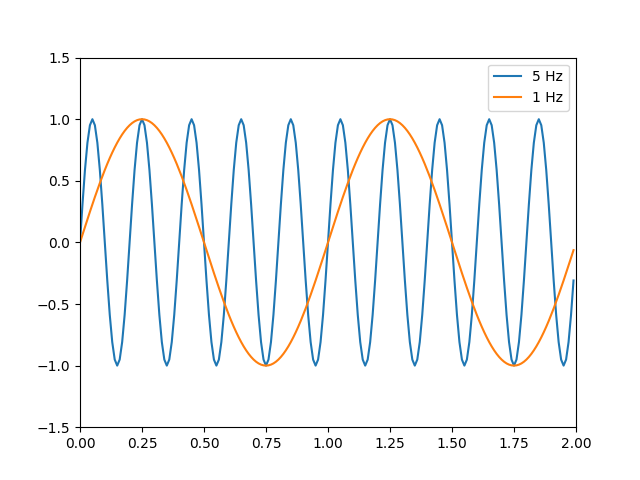

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import ipywidgets as widgets
from IPython.display import display

%matplotlib ipympl

# Parameters
sampling_rate = 100  # samples per second
duration = 2  # seconds
frequency1 = 5  # Hz
frequency2 = 1  # Hz

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Create figure and axes
fig, ax = plt.subplots()
line1, = ax.plot(t, np.sin(2 * np.pi * frequency1 * t), label='5 Hz')
line2, = ax.plot(t, np.sin(2 * np.pi * frequency2 * t), label='1 Hz')
ax.legend()

# Set up plot limits
ax.set_xlim(0, duration)
ax.set_ylim(-1.5, 1.5)

# Animation function
def animate(i):
    line1.set_ydata(np.sin(2 * np.pi * frequency1 * (t + i / sampling_rate)))
    line2.set_ydata(np.sin(2 * np.pi * frequency2 * (t + i / sampling_rate)))
    return line1, line2

# Create animation
ani = animation.FuncAnimation(fig, animate, frames=314, interval=20, blit=True)

# Slider for frequency2
frequency2_slider = widgets.FloatSlider(value=frequency2, min=0.1, max=10.0, step=0.1, description='Frequency2')

# Update function for slider
def update_frequency2(change):
    global frequency2
    frequency2 = change['new']
    line2.set_label(f'{frequency2} Hz')
    ax.legend()

frequency2_slider.observe(update_frequency2, names='value')

# Display the plot and slider
display(frequency2_slider)
plt.show()

In [20]:
import numpy as np
import turtle
import tkinter as tk
import keyboard 

# Create a turtle object
t = turtle.Turtle()
t.speed(10)  # Set the turtle's speed to fastest

# Function to draw a rotating circle
def rotating_circle(radius, angle):
    for i in range(int(360/angle)):
        t.circle(radius)
        t.right(angle)  # Rotate the turtle before drawing the next circle
        
        # if keyboard.read_key() == "q":
        #     print("Exiting...")
        # else:
        #     pass



# Draw the rotating circle
rotating_circle(100, 18)

# Keep the window open
turtle.done()





KeyboardInterrupt: 

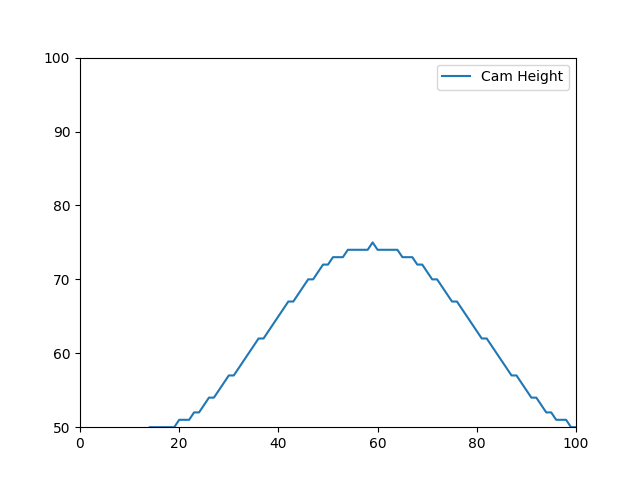

In [2]:
import numpy as np
import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import ipywidgets as widgets
from IPython.display import display

%matplotlib ipympl

cv.destroyAllWindows()

# Parameters for the rotating oval
center = (256, 256)  # Center of the oval

#num_frames = 2 * 360 // angle_step  # Number of frames for a full rotation
stick_height = 50  # Height of the stick
stick_pos_x = 287  # X position of the stick
i=0
angle = 0
ytemp = np.zeros(100)

## Matplotlib Animation
# Parameters
sampling_rate = 100  # samples per second
duration = 2  # seconds
t = np.linspace(1,100,100)
#print(t,"\n",ytemp)

# Create figure and axes
plt.ion()
fig, ax = plt.subplots()
line1, = ax.plot(t, ytemp, label='Cam Height')

ax.legend()

# Set up plot limits
ax.set_xlim(0, 100)
ax.set_ylim(50,100)

# Animation function
def animate(angle):
    line1.set_ydata(angle, ycoord)
    
    return line1, line2


## OPEN CV Animation
# Create a window to display the animation
cv.namedWindow('Rotating Oval', cv.WINDOW_NORMAL)
cv.resizeWindow('Rotating Oval', 800, 800)

# Create a trackbar for controlling the animation speed
def nothing(x):
    pass

cv.createTrackbar('Speed', 'Rotating Oval', 2, 10, nothing)
cv.createTrackbar('Major Axis', 'Rotating Oval', 75, 200, nothing)

majorAxis = 75  # Length of the axes of the oval
minorAxis = 50
angle_step = 2  # Angle step for rotation

#for i in range(num_frames):
while True:
    # Create a black image
    img = np.zeros((512, 512, 3), np.uint8)
    
    # Calculate the rotation angle
    angle = i * angle_step
    
    # Draw the rotated oval
    cv.ellipse(img, center, (majorAxis,minorAxis), angle, 0, 360, (255, 0, 0), 2)
    
    cv.ellipse(img, center, (majorAxis,minorAxis), angle, 270, 271, (0, 0, 255), 2)

    #x = a cos(θ) cos(φ) - b sin(θ) sin(φ)
    xcoord = majorAxis*np.abs(np.cos(np.radians(90-angle)))*np.abs(np.cos(np.radians(-angle))) - minorAxis*np.abs(np.sin(np.radians(90-angle)))*np.abs(np.sin(np.radians(-angle)))
    ycoord = majorAxis*np.abs(np.cos(np.radians(90-angle)))*np.abs(np.sin(np.radians(-angle))) + minorAxis*np.abs(np.sin(np.radians(90-angle)))*np.abs(np.cos(np.radians(-angle)))
    #ycoord = (majorAxis*minorAxis)/np.sqrt(majorAxis**2 + ((minorAxis**2)/(np.abs(np.tan(np.radians(90-angle)))**2)))
    
    # xcoord = axes_length[0]*(np.cos(np.radians(270)))*(np.cos(np.radians(-angle))) - axes_length[1]*(np.sin(np.radians(270)))*(np.sin(np.radians(-angle)))
    # ycoord = axes_length[0]*(np.cos(np.radians(270)))*(np.sin(np.radians(-angle))) + axes_length[1]*(np.sin(np.radians(270)))*(np.cos(np.radians(-angle)))
    
    #print(xcoord,ycoord)
    xcoord = int(xcoord)
    ycoord = int(ycoord)
    
    
    ytemp = np.append(ytemp, ycoord)
    
    #print(f'test {i}')
    
    
    #print(ytemp)
    ytemp = ytemp[1:]
    line1.set_xdata(t)  # Update the x data
    line1.set_ydata(ytemp)  # Plot the point on the graph
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
  
    #Draw Follower Stick
    cv.line(img,(center[0],center[1]-ycoord),(center[0],center[1]-stick_height-ycoord),(0,255,0),2)
    
    # Display the image
    cv.imshow('Rotating Oval', img)
    
    # Get the current value of the speed trackbar
    angle_step = cv.getTrackbarPos('Speed', 'Rotating Oval')
    majorAxis = cv.getTrackbarPos('Major Axis', 'Rotating Oval')
    
    i = i + 1

    if cv.waitKey(50) & 0xFF == ord('q'):
        break

# Destroy the window
cv.destroyAllWindows()


In [8]:
import pygame
import math

# Initialize pygame
pygame.init()

# Screen dimensions
width, height = 800, 600
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Rotating Ellipse")

# Colors
black = (0, 0, 0)
white = (255, 255, 255)

# Ellipse parameters
center = (width // 2, height // 2)
axes_length = (75, 50)
angle_step = 5
angle = 0

# Stick parameters
stick_height = 50

# Specific x value to find y values for
specific_x = center[0] + 50  # Example: 50 units to the right of the center

# Clock object to control the frame rate
clock = pygame.time.Clock()

# Function to find y values at a specific x for a rotated ellipse
def find_y_values(x, angle, center, axes_length):
    a, b = axes_length
    cos_angle = math.cos(math.radians(angle))
    sin_angle = math.sin(math.radians(angle))
    
    # Translate x to the ellipse's coordinate system
    x_translated = x - center[0]
    
    # Calculate the corresponding y values in the ellipse's coordinate system
    y1 = b * math.sqrt(1 - (x_translated / a) ** 2)
    y2 = -y1
    
    # Rotate the points back to the screen's coordinate system
    y1_rotated = center[1] + y1 * cos_angle - x_translated * sin_angle
    y2_rotated = center[1] + y2 * cos_angle - x_translated * sin_angle
    
    return y1_rotated, y2_rotated

# Main loop
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Clear the screen
    screen.fill(black)

    # Calculate the rotated ellipse points
    ellipse_surface = pygame.Surface((2 * axes_length[0], 2 * axes_length[1]), pygame.SRCALPHA)
    ellipse_surface.fill((0, 0, 0, 0))
    pygame.draw.ellipse(ellipse_surface, white, (0, 0, 2 * axes_length[0], 2 * axes_length[1]), 2)
    rotated_surface = pygame.transform.rotate(ellipse_surface, angle)
    rotated_rect = rotated_surface.get_rect(center=center)

    # Draw the rotated ellipse
    screen.blit(rotated_surface, rotated_rect.topleft)

    # Find y values at the specific x
    y1, y2 = find_y_values(specific_x, angle, center, axes_length)
    #print(f"At angle {angle} degrees, y values at x = {specific_x} are {y1} and {y2}")
    y = max(y1, y2)

    # Draw the stick at the specific x and y position
    pygame.draw.line(screen, white, (specific_x, y), (specific_x, y - stick_height), 2)
    
    # Update the display
    pygame.display.flip()

    # Increment the angle
    angle += angle_step
    if angle >= 360:
        angle -= 360

    # Control the frame rate
    clock.tick(30)

# Quit pygame
pygame.quit()

In [9]:
import pygame 
import random 

# GLOBAL VARIABLES 
COLOR = (255, 100, 98) 
SURFACE_COLOR = (167, 255, 100) 
WIDTH = 500
HEIGHT = 500

# Object class 
class Sprite(pygame.sprite.Sprite): 
	def __init__(self, color, height, width): 
		super().__init__() 

		self.image = pygame.Surface([width, height]) 
		self.image.fill(SURFACE_COLOR) 
		self.image.set_colorkey(COLOR) 

		pygame.draw.ellipse(self.image,color,pygame.Rect(0, 0, width, height)) 

		self.rect = self.image.get_rect() 

	def rotate(self, angle): 
		self.image = pygame.transform.rotate(self.image, angle)

pygame.init() 

RED = (255, 0, 0) 

size = (WIDTH, HEIGHT) 
screen = pygame.display.set_mode(size) 
pygame.display.set_caption("Creating Sprite") 

all_sprites_list = pygame.sprite.Group() 

object_ = Sprite(RED, 100, 150) 
object_.rect.x = 200
object_.rect.y = 300

all_sprites_list.add(object_) 

# for i in range(360):
# 	object_.rotate(i)

exit = True
clock = pygame.time.Clock() 

while exit: 
	for event in pygame.event.get(): 
		if event.type == pygame.QUIT: 
			exit = False

	all_sprites_list.update() 
	screen.fill(SURFACE_COLOR) 
	all_sprites_list.draw(screen)
	
	pygame.display.flip() 
	clock.tick(60) 

pygame.quit() 


In [10]:
import sys, pygame
from pygame.locals import *

pygame.init()
SCREEN = pygame.display.set_mode((200, 200))
CLOCK  = pygame.time.Clock()

surface = pygame.Surface((50 , 50), pygame.SRCALPHA)
surface.fill((0, 0, 0))
rotated_surface = surface
rect = surface.get_rect()
angle = 0

while True:
    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            sys.exit()

    SCREEN.fill((255, 255, 255))
    angle += 5
    rotated_surface = pygame.transform.rotate(surface, angle)
    rect = rotated_surface.get_rect(center = (100, 100))
    SCREEN.blit(rotated_surface, (rect.x, rect.y))

    pygame.display.update()
    CLOCK.tick(30)

SystemExit: 

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg') #This works nice using tk backend to run the matplotlib window so it can update out of line with the notebook

cv.destroyAllWindows()

## Initialize Variables for CV animation

center = (256, 256)  # Center of the oval
stick_height = 50  # Height of the stick
stick_pos_x = 256  # X position of the stick
i=0
angle = 0
majorAxis = 75  # Length of the axes of the oval
minorAxis = 50  
angle_step = 2  # Angle step for rotation

## Initialize OPEN CV Animation
# Create a window to display the animation
cv.namedWindow('Cam Follower', cv.WINDOW_NORMAL)
cv.resizeWindow('Cam Follower', 800, 800)

# Placeholder empty funct for trackbars
def nothing(x):
    pass

# Create trackbars for adjusting cam speed and axes
cv.createTrackbar('Speed', 'Cam Follower', 2, 10, nothing)
cv.createTrackbar('Major Axis', 'Cam Follower', 75, 200, nothing)
cv.createTrackbar('Minor Axis', 'Cam Follower', 50, 200, nothing)


## Initialize Matplotlib
t = np.linspace(1,100,100)
ytemp = np.zeros(100) # Array for plotting 

# Create figure and axes
plt.ion()
fig, ax = plt.subplots()
line1, = ax.plot(t, ytemp, label='Follower Height')
ax.legend()

# Set up plot limits
ax.set_xlim(0, 100)
ax.set_ylim(0,200)



while True:
    # Create a black image
    img = np.zeros((512, 512, 3), np.uint8)
    
    # Calculate the rotation angle every loop
    angle = i * angle_step
    
    # Create vector of points representing the cam for calculation use later
    Cvector = cv.ellipse2Poly(center, (minorAxis,minorAxis), angle, 0, 360, 1)
    Evector = cv.ellipse2Poly(center, (majorAxis,minorAxis), angle, 0, 360, 1)
    
    # Draw ellipses to represent the calculated cam
    cv.ellipse(img, center, (majorAxis,minorAxis), angle, 90, 270, (255, 0, 0), -1)
    cv.ellipse(img, center, (minorAxis,minorAxis), angle, -90, 90, (255, 0, 0), -1)
    cv.ellipse(img, center, (6,6), 0, 0, 360, (10, 10, 10), -1)
    
    # depending on the angle (on circle side or ellipse side of cam), calcuate the largest y value for a specifc x value
    if np.sin(np.radians(angle)) >= 0:
        matching = np.where((Evector[:,0] >= stick_pos_x-2) & (Evector[:,0] <= stick_pos_x+2))[0]
        yheight = min(Evector[matching[:],1])
    elif np.sin(np.radians(angle)) < 0:
        matching = np.where((Cvector[:,0] >= stick_pos_x-2) & (Cvector[:,0] <= stick_pos_x+2))[0]
        yheight = min(Cvector[matching[:],1])
    else:
        pass
    
    #Draw Follower Stick
    cv.line(img,(stick_pos_x,yheight-stick_height),(stick_pos_x,yheight),(0,255,0),2)
    
    # Display the image
    cv.imshow('Cam Follower', img)

    # Matplotlib update, Shift the data in the ytemp over one and add the new data point
    ytemp = np.append(ytemp, -yheight + center[1])
    ytemp = ytemp[1:]
    line1.set_xdata(t)  # Update the x data
    line1.set_ydata(ytemp)  # Update the y data
    fig.canvas.draw_idle()  # Plot updated figure
    fig.canvas.flush_events()  # This does somethign to not crash the code
  

    # Recheck the trackbar values at the end of each loop and reassign them to the vars
    angle_step = cv.getTrackbarPos('Speed', 'Cam Follower')
    majorAxis = cv.getTrackbarPos('Major Axis', 'Cam Follower')
    minorAxis = cv.getTrackbarPos('Minor Axis', 'Cam Follower')
    
    # Increment for the angle
    i = i + 1

    # This is the exit for the loop 'q' to quit
    if cv.waitKey(50) & 0xFF == ord('q'):
        break

# Destroy the window after quit
cv.destroyAllWindows()
plt.close(fig)
